In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

%matplotlib inline

In [2]:
df = pd.DataFrame()
for folder in glob.glob('*_input_*/'):
    sc_file = folder + "score.sc"
    if os.path.exists(sc_file):
        dsc = pd.read_csv(sc_file, sep='\s+', header=1)
        df = pd.concat([df,dsc])
df = df.reset_index()
print(df)

      index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0         0  SCORE:     -911.862               0.0                 0.029   
1         1  SCORE:     -911.815               0.0                 0.008   
2         2  SCORE:     -901.511               0.0                 0.010   
3         3  SCORE:     -907.980               0.0                 0.000   
4         4  SCORE:     -915.004               0.0                 0.042   
5         5  SCORE:     -910.824               0.0                 0.000   
6         6  SCORE:     -902.694               0.0                 0.022   
7         7  SCORE:     -912.720               0.0                 0.030   
8         8  SCORE:     -913.118               0.0                 0.000   
9         9  SCORE:     -914.831               0.0                 0.000   
10        0  SCORE:     -920.328               0.0                 0.000   
11        1  SCORE:     -917.125               0.0                 0.015   
12        2 

18.70882202662087


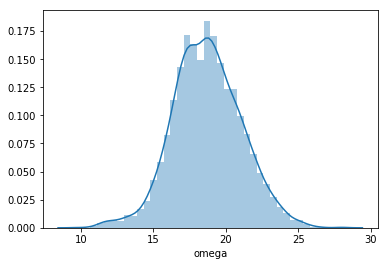

In [3]:
sns.distplot(df["omega"], bins=40)
print(df['omega'].mean())

1.6765287677114642


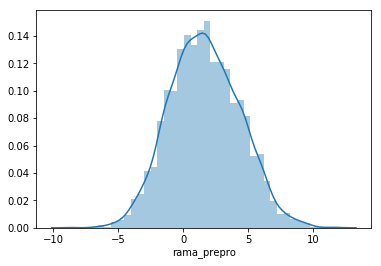

In [4]:
sns.distplot(df["rama_prepro"], bins=40)
print(df['rama_prepro'].mean())

-132.40091219407472


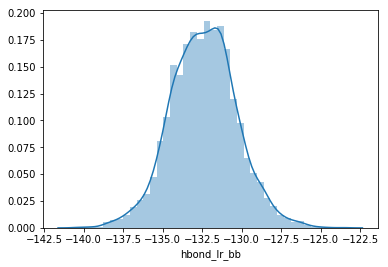

In [5]:
sns.distplot(df["hbond_lr_bb"], bins=40)
print(df['hbond_lr_bb'].mean())

-922.0027060970375


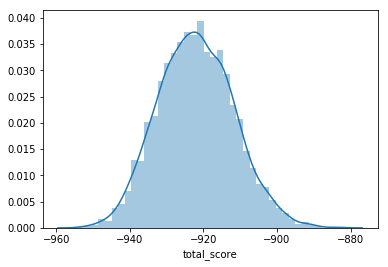

In [6]:
sns.distplot(df["total_score"], bins=40)
print(df['total_score'].mean())

-61.04146028338344


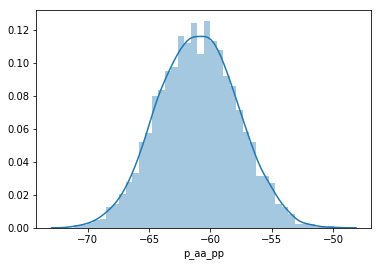

In [7]:
sns.distplot(df["p_aa_pp"], bins=40)
print(df['p_aa_pp'].mean())

In [8]:
for index, row in df.iterrows():
#for model in df.description:
    nets = 0
    model = row["description"]
    HBNet = []
    energy_table = []
    labels = []
    tot_energy = 0
    mean_energy = 0
    tot_hbond = 0
    mean_hbond = 0
    folder_id = "_".join(model.split("_")[0:5]) #+ "_" + model.split("_")[4][3:]
    pdb_file = folder_id + "/" + model + ".pdb"
    with open(pdb_file, 'r') as pdb_f:
        for line in pdb_f:
            if "HBNet" in line:
                HBNet.append(int(line.split()[2]))
            elif line.startswith("label"):
                labels = line.strip().split(' ')
                next(pdb_f)
                next(pdb_f)
                for line in pdb_f:
                    if line.startswith("#END_POSE_ENERGIES_TABLE"):
                        break
                    energy_table.append(line.strip().split(' '))
    de = pd.DataFrame(energy_table, columns=labels)
    de['label'] = de['label'].str.replace('HIS_D', 'HIS')
    new_c = de['label'].str.split('_', expand=True)
    de['resn'] = new_c[1].astype(int)
    HBNet_DE = []
    for item in HBNet:
        if item != 10 and item != 96:
            HBNet_DE.append(item)
        else: 
            nets +=1
    tot_energy = de['total'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_energy = tot_energy/len(HBNet)
    tot_hbond = de['hbond_sc'].loc[de['resn'].isin(HBNet)].astype(float).sum()
    mean_hbond = tot_hbond/len(HBNet)
    tot_energy_DE = de['total'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_energy_DE = tot_energy/len(HBNet_DE)
    tot_hbond_DE = de['hbond_sc'].loc[de['resn'].isin(HBNet_DE)].astype(float).sum()
    mean_hbond_DE = tot_hbond/len(HBNet_DE)
    df.at[index,'tot_energy'] = tot_energy
    df.at[index,'mean_energy'] = mean_energy
    df.at[index,'tot_hbond'] = tot_hbond
    df.at[index,'mean_hbond'] = mean_hbond
    df.at[index,'nHBNet'] = len(HBNet)
    df.at[index,'tot_energy_DE'] = tot_energy_DE
    df.at[index,'mean_energy_DE'] = mean_energy_DE
    df.at[index,'tot_hbond_DE'] = tot_hbond_DE
    df.at[index,'mean_hbond_DE'] = mean_hbond_DE
print(df)
                

      index  SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0         0  SCORE:     -911.862               0.0                 0.029   
1         1  SCORE:     -911.815               0.0                 0.008   
2         2  SCORE:     -901.511               0.0                 0.010   
3         3  SCORE:     -907.980               0.0                 0.000   
4         4  SCORE:     -915.004               0.0                 0.042   
5         5  SCORE:     -910.824               0.0                 0.000   
6         6  SCORE:     -902.694               0.0                 0.022   
7         7  SCORE:     -912.720               0.0                 0.030   
8         8  SCORE:     -913.118               0.0                 0.000   
9         9  SCORE:     -914.831               0.0                 0.000   
10        0  SCORE:     -920.328               0.0                 0.000   
11        1  SCORE:     -917.125               0.0                 0.015   
12        2 

-25.345697458136538


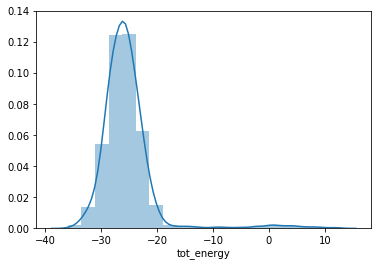

In [9]:
sns.distplot(df["tot_energy"], bins=20)
print(df['tot_energy'].mean())

-6.3364243645341345


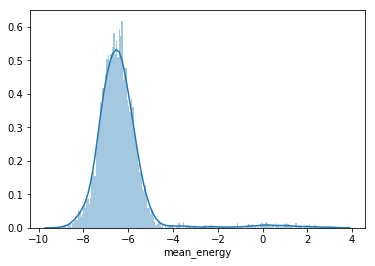

In [10]:
sns.distplot(df["mean_energy"], bins=200)
print(df['mean_energy'].mean())

-4.2468819278660375


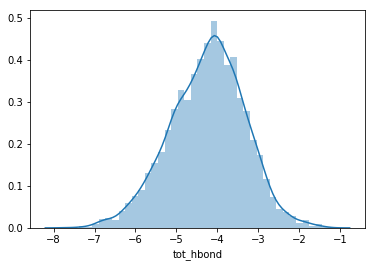

In [11]:
sns.distplot(df["tot_hbond"], bins=40)
print(df['tot_hbond'].mean())

-1.0617204819665094


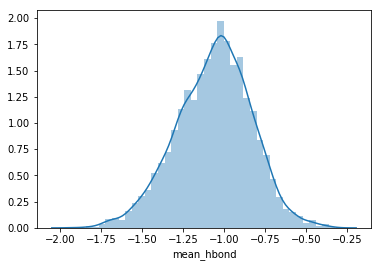

In [12]:
sns.distplot(df["mean_hbond"], bins=40)
print(df['mean_hbond'].mean())

-14.003803338342635


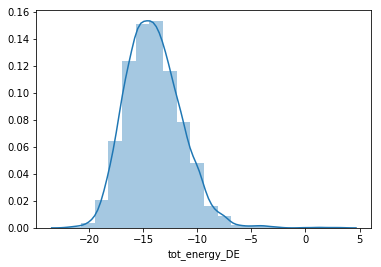

In [13]:
sns.distplot(df["tot_energy_DE"], bins=20)
print(df['tot_energy_DE'].mean())

-12.672848729068269


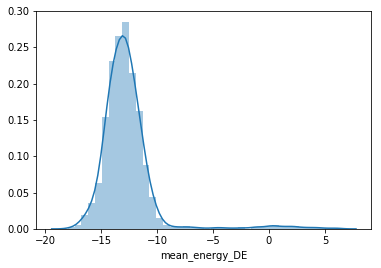

In [14]:
sns.distplot(df["mean_energy_DE"], bins=40)
print(df['mean_energy_DE'].mean())

-2.413846343924431


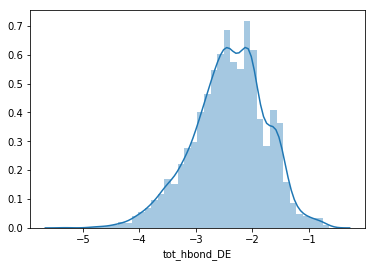

In [15]:
sns.distplot(df["tot_hbond_DE"], bins=40)
print(df['tot_hbond_DE'].mean())

-2.1234409639330187


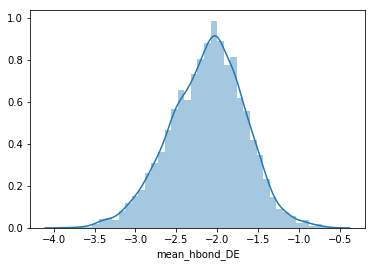

In [16]:
sns.distplot(df["mean_hbond_DE"], bins=40)
print(df['mean_hbond_DE'].mean())

# In terms of mean_energy, it does not really matter if we consider the full motif or the DE only. mean_energy_DE would only allow keeping a few of exta points along the secondary correlation line. It does not correlate with omega, rama_prepro or hbond_lr_bb.

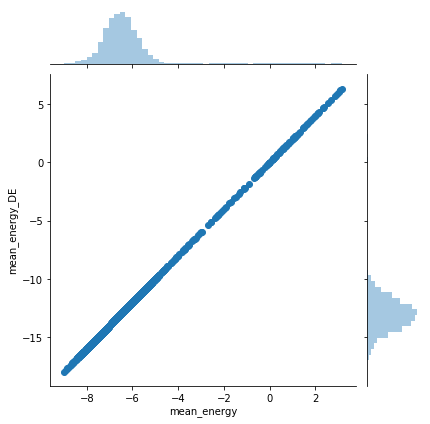

In [17]:
sns.jointplot("mean_energy", "mean_energy_DE", df);

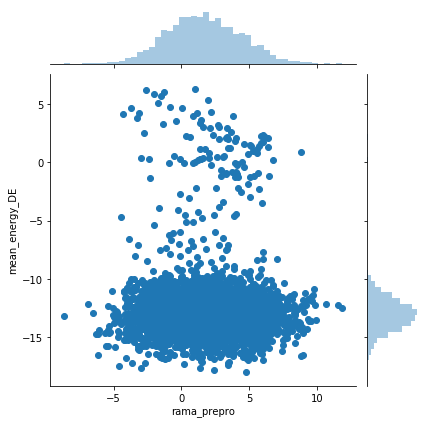

In [18]:
sns.jointplot("rama_prepro", "mean_energy_DE", df);

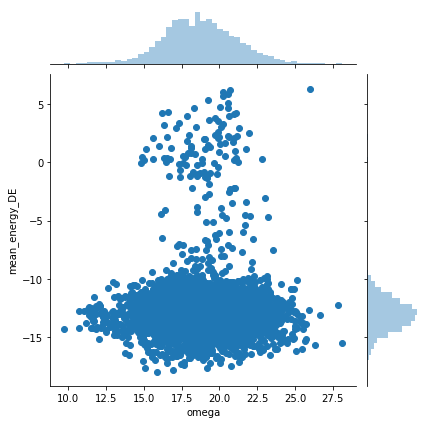

In [19]:
sns.jointplot("omega", "mean_energy_DE", df);

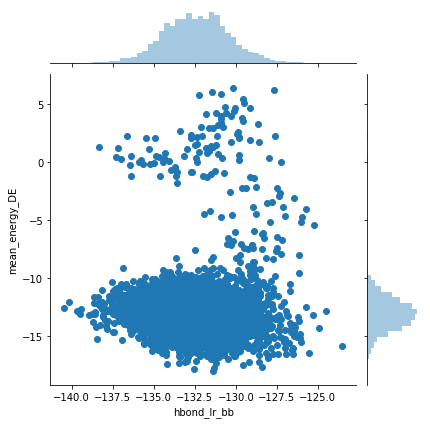

In [20]:
sns.jointplot("hbond_lr_bb", "mean_energy_DE", df);

# The cutoff of -1.8 mean_hbond_DE is more intuitive and will help keeping the variants along the secondary correlation axis. It does not correlate with omega, rama_prepro of hbond_lr_bb

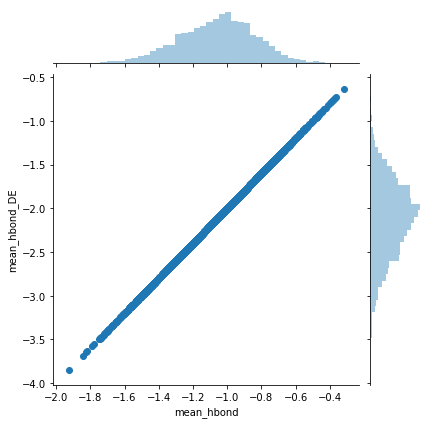

In [21]:
sns.jointplot("mean_hbond", "mean_hbond_DE", df);

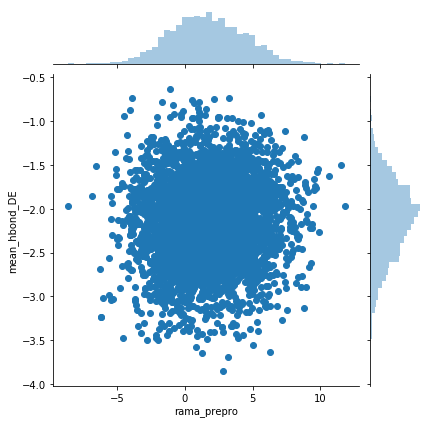

In [22]:
sns.jointplot("rama_prepro", "mean_hbond_DE", df);

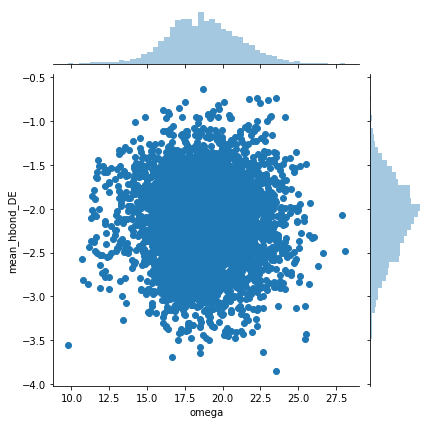

In [23]:
sns.jointplot("omega", "mean_hbond_DE", df);

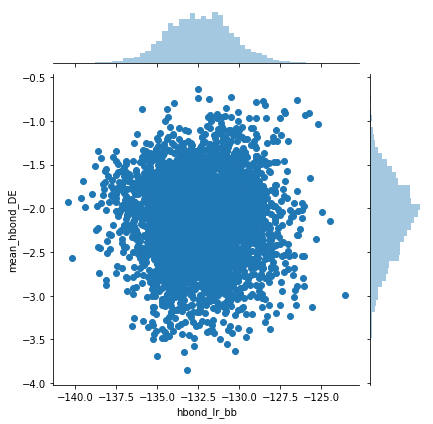

In [24]:
sns.jointplot("hbond_lr_bb", "mean_hbond_DE", df);

In [30]:
df.loc[(df['hbond_lr_bb']<-130)& (df['omega']<=20.0) & (df['mean_energy_DE']<-10.0) &(df['mean_energy']<-5.0) & (df['rama_prepro']<=2.5)]# & (df['mean_energy_DE']<-10) & (df['rama_prepro']<=-5) ].shape


,index,SCORE:,total_score,angle_constraint,atom_pair_constraint,dihedral_constraint,dslf_fa13,fa_atr,fa_dun,fa_elec,...,description,tot_energy,mean_energy,tot_hbond,mean_hbond,nHBNet,tot_energy_DE,mean_energy_DE,tot_hbond_DE,mean_hbond_DE
2,2,SCORE:,-901.511,0.0,0.010,0.475,0.0,-985.992,228.514,-657.963,...,15_input_0011_0004_14_0003,-29.47860,-7.369650,-5.37711,-1.344278,4.0,-16.18192,-14.739300,-3.26961,-2.688555
8,8,SCORE:,-913.118,0.0,0.000,0.755,0.0,-962.658,213.189,-663.409,...,15_input_0011_0004_14_0009,-28.06233,-7.015582,-4.03324,-1.008310,4.0,-16.43090,-14.031165,-2.77102,-2.016620
12,2,SCORE:,-915.670,0.0,0.000,1.057,0.0,-984.281,200.167,-630.531,...,19_input_0090_0005_19_0003,-21.92025,-5.480062,-4.33661,-1.084153,4.0,-12.25197,-10.960125,-2.40933,-2.168305
19,0,SCORE:,-906.895,0.0,0.000,0.242,0.0,-971.339,209.030,-671.513,...,18_input_0087_0001_5_0001,-20.88845,-5.222112,-3.50786,-0.876965,4.0,-11.05094,-10.444225,-2.03655,-1.753930
20,1,SCORE:,-905.946,0.0,0.004,0.573,0.0,-961.348,201.518,-652.691,...,18_input_0087_0001_5_0002,-22.48095,-5.620237,-4.00835,-1.002088,4.0,-11.54137,-11.240475,-2.36062,-2.004175
21,2,SCORE:,-905.345,0.0,0.001,0.289,0.0,-978.366,193.689,-649.602,...,18_input_0087_0001_5_0003,-26.95921,-6.739803,-3.03368,-0.758420,4.0,-16.53500,-13.479605,-1.51684,-1.516840
25,6,SCORE:,-903.669,0.0,0.000,0.377,0.0,-964.439,198.029,-657.352,...,18_input_0087_0001_5_0007,-25.82088,-6.455220,-3.66591,-0.916477,4.0,-15.06669,-12.910440,-2.08032,-1.832955
26,7,SCORE:,-906.555,0.0,0.000,0.415,0.0,-992.951,194.611,-640.400,...,18_input_0087_0001_5_0008,-26.91802,-6.729505,-3.89106,-0.972765,4.0,-15.41200,-13.459010,-2.32246,-1.945530
33,4,SCORE:,-910.552,0.0,0.029,0.287,0.0,-943.153,187.191,-650.562,...,107_input_0047_0001_5_0005,-28.00731,-7.001828,-5.41220,-1.353050,4.0,-15.57676,-14.003655,-2.25936,-2.706100
38,9,SCORE:,-920.025,0.0,0.054,0.154,0.0,-925.629,205.514,-706.530,...,107_input_0047_0001_5_0010,-27.12811,-6.782027,-5.25815,-1.314537,4.0,-15.71737,-13.564055,-2.81257,-2.629075


In [28]:
df.loc[df['mean_hbond_DE']<-1.8].shape

(8365, 35)

In [31]:
best_motif =df.loc[(df['hbond_lr_bb']<-130)& (df['omega']<=20.0) & (df['mean_energy_DE']<-10.0) &(df['mean_energy']<-5.0) & (df['rama_prepro']<=2.5)]# & (df['mean_energy_DE']<-10) & (df['rama_prepro']<=-5) ].shape


In [32]:
#best_motif = df.loc[(df['mean_hbond_DE']<-1.8) & (df['mean_energy_DE']<-10) & (df['omega']<=18) & (df['rama_prepro']<=-5) & (df['hbond_lr_bb']<=-127.5)]
for model in best_motif.description:
    folder_id = "_".join(model.split("_")[0:5])
    source = folder_id + "/" + model + ".pdb"
    target = "../round2_surf_B/" + model + ".pdb"
    copyfile(source, target)

16.55983042394015


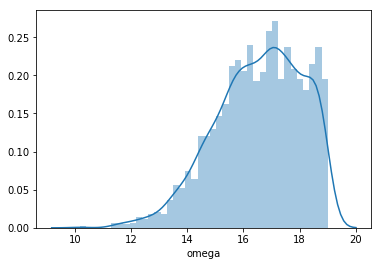

In [42]:
sns.distplot(best_motif["omega"], bins=40)
print(best_motif['omega'].mean())

15.03010174563591


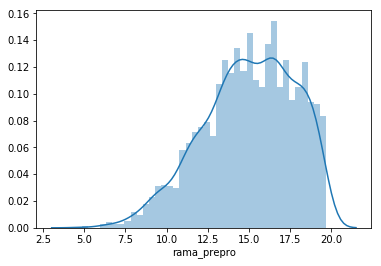

In [43]:
sns.distplot(best_motif["rama_prepro"], bins=40)
print(best_motif['rama_prepro'].mean())

-124.71991471321697


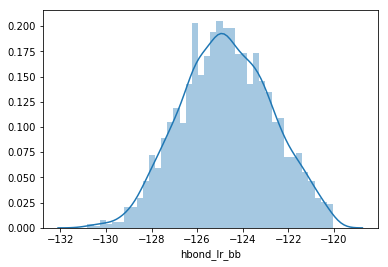

In [44]:
sns.distplot(best_motif["hbond_lr_bb"], bins=40)
print(best_motif['hbond_lr_bb'].mean())

In [47]:
df.loc[(df['mean_hbond_DE']>-1.2) & (df['mean_energy_DE']>-10)].shape

(868, 35)

In [49]:
worst_motif = df.loc[(df['mean_hbond_DE']>-1.2) & (df['mean_energy_DE']>-10)]
for model in worst_motif.description:
    folder_id = "_".join(model.split("_")[0:5])
    source = folder_id + "/" + model + ".pdb"
    target = "worst_motif/" + model + ".pdb"
    copyfile(source, target)